In [163]:
## Importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import  CountVectorizer

In [143]:
path = ('/Users/ivanm/apps/iteso-data-analytics/data/raw/Práctica_one.csv')
df=pd.read_csv(path)
df

,Nombre,Edad,Formación académica,Antigüedad,Resultado de evaluación
0,Alvarado Zepeda Diana,51.0,Ingeniería Industrial,16.0,3.625
1,Bonilla Sandoval Martín,65.0,Licenciatura en sociología,9.0,6.070
2,Bonilla Sánchez Daniel,28.0,Lic. en matemáticas,15.0,4.630
3,Bravo Cortéz Marcos,53.0,Ingeniería en Mecatrónica,11.0,6.525
4,Bravo Gomez Pedro,33.0,Ingeniería en Mecatrónica,11.0,7.990
...,...,...,...,...,...
70,Ávila López Carmen,68.0,Ing. en mecatrónica,6.0,NaN
71,Jiménez de Alba Enrique,58.0,NaN,NaN,5.755
72,Sánchez Pineda Ramón,36.0,NaN,15.0,4.680
73,Pérez Jiménez Francisco,64.0,Ingeniería en Mecatrónica,NaN,4.410


In [144]:
df.dtypes

Nombre                      object
Edad                       float64
Formación académica         object
Antigüedad                 float64
Resultado de evaluación    float64
dtype: object

In [145]:
## Aqui podemos notar cuantos valores NaN tenemos por cada columna del DataFrame
## Tenemos 0 en Nombre, 5 en Edad, 5 en Formacion academica, 4 en Antiguedad 
## y 3 en Resultado de evaluacion

df.isna().sum()

Nombre                     0
Edad                       5
Formación académica        5
Antigüedad                 4
Resultado de evaluación    3
dtype: int64

Notamos que en ninguna variable los datos faltantes superan el 60% de las observaciones asi que no eliminamos ninguna variable.

In [146]:
df['Formación académica'].mode()

0    Ingeniería Industrial
Name: Formación académica, dtype: object

In [147]:
df['Formación académica'] = df['Formación académica'].fillna(df['Formación académica'].mode().iloc[0])

In [148]:
df['Edad'].kurt()

-1.3068316092609022

In [149]:
df['Antigüedad'].kurt()

0.1289581810705296

In [150]:
df['Resultado de evaluación'].kurt()

0.893258600734125

Solo la variable de Edad presenta una distrubicion uniforme dado que estamos considerando como distribucion uniforme una curtosis menor a -1.2 y tenemos las siguientes curtosis:

Edad: -1.3068316092609022

Antigüedad: 0.1289581810705296

Resultado de evaluación: 0.893258600734125

<Axes: ylabel='Frequency'>

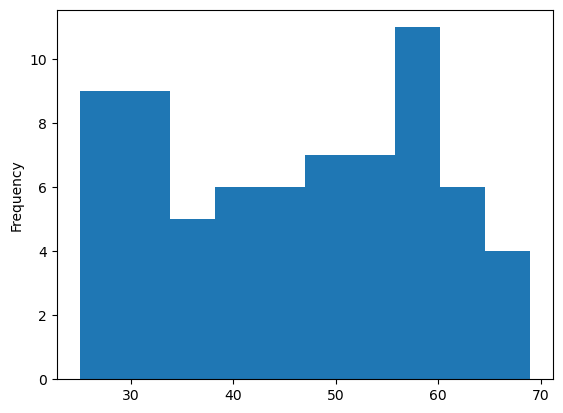

In [151]:
df['Edad'].plot(kind='hist')

<Axes: ylabel='Frequency'>

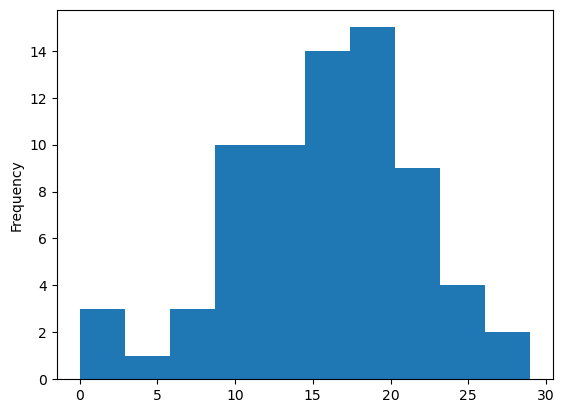

In [152]:
df['Antigüedad'].plot(kind='hist')

<Axes: ylabel='Frequency'>

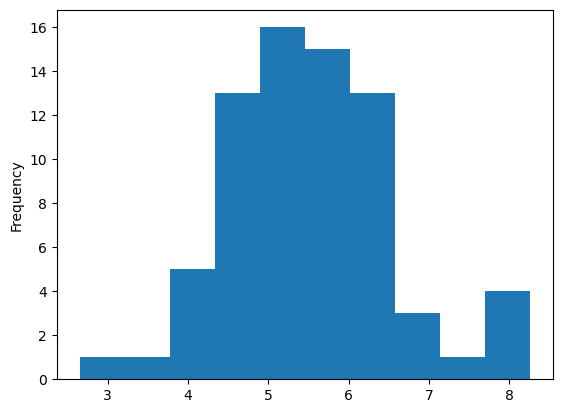

In [153]:
df['Resultado de evaluación'].plot(kind='hist')

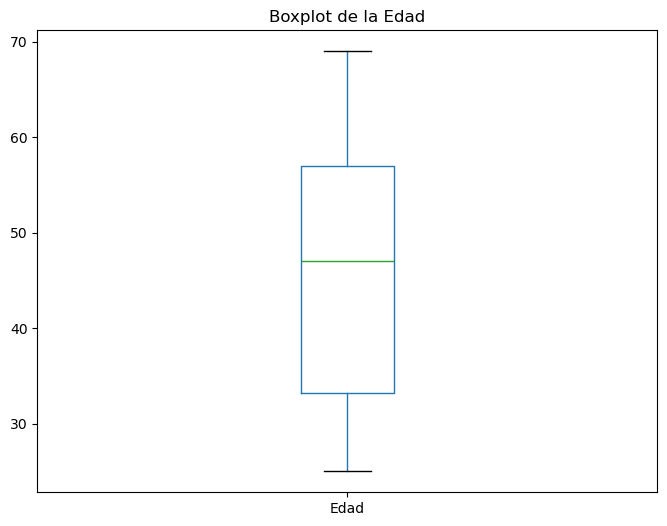

In [154]:
## Ahora realizaremos un boxplot para cada una de nuestras variables y poder verificar si existen valores atipicos o no
## Sustituya por la media aritmética si no presenta valores atípicos
## Sustituya por la mediana si presenta valores atípicos

plt.figure(figsize=(8, 6))
df.boxplot(column='Edad')
plt.title('Boxplot de la Edad')
plt.grid(False)
plt.show()

## No presenta valores atipicos
## por lo que sustituiremos los faltantes con la media aritmetica

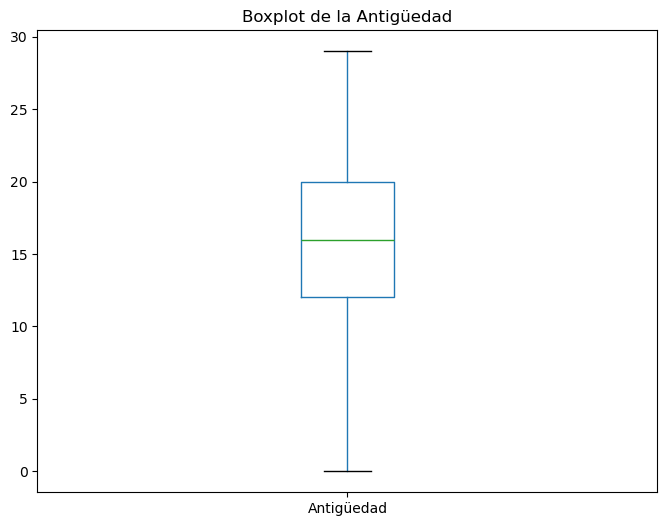

In [155]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Antigüedad')
plt.title('Boxplot de la Antigüedad')
plt.grid(False)
plt.show()

## En esta variable tampoco detectamos valores atipicos
## por lo que sustituiremos los faltantes con la media aritmetica

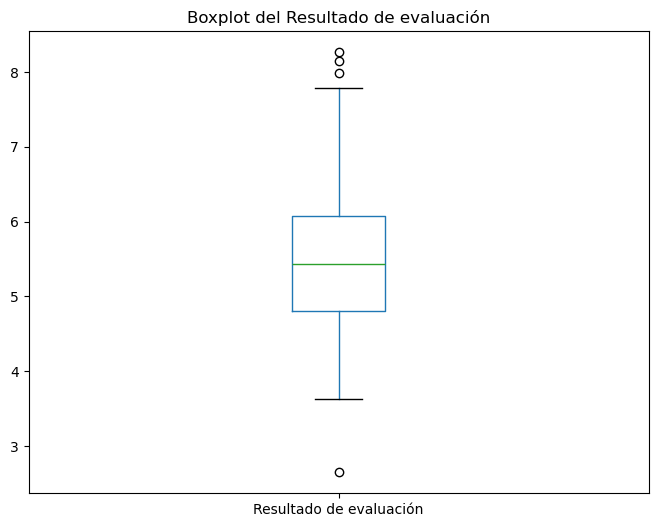

In [156]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Resultado de evaluación')
plt.title('Boxplot del Resultado de evaluación')
plt.grid(False)
plt.show()

## Por ultimo en la ultima variable si encontramos valores atipicos
## por lo que sustituiremos los valores faltantes con la mediana

En las siguientes 3 celdas de codigo hacemos el reemplazo de NaN de las variables restantes segun el criterio elegido, aleatoria para una distribucion normal, tal como la de la Edad, por media para una variable que no muestra valores atipicos tal como la Antiguedad y por mediana para una que si muestra valores atipicos como el Resultado de Evaluacion.

In [157]:
media_edad = df['Edad'].mean()
desviacion_estandar_edad = df['Edad'].std()

num_nans = df['Edad'].isnull().sum()

valores_aleatorios = np.random.normal(media_edad, desviacion_estandar_edad, num_nans)

df.loc[df['Edad'].isnull(), 'Edad'] = valores_aleatorios

In [158]:
df['Antigüedad'] = df['Antigüedad'].fillna(df['Antigüedad'].mean())

In [159]:
df['Resultado de evaluación'] = df['Resultado de evaluación'].fillna(df['Resultado de evaluación'].median())

In [160]:
df

,Nombre,Edad,Formación académica,Antigüedad,Resultado de evaluación
0,Alvarado Zepeda Diana,51.0,Ingeniería Industrial,16.000000,3.6250
1,Bonilla Sandoval Martín,65.0,Licenciatura en sociología,9.000000,6.0700
2,Bonilla Sánchez Daniel,28.0,Lic. en matemáticas,15.000000,4.6300
3,Bravo Cortéz Marcos,53.0,Ingeniería en Mecatrónica,11.000000,6.5250
4,Bravo Gomez Pedro,33.0,Ingeniería en Mecatrónica,11.000000,7.9900
...,...,...,...,...,...
70,Ávila López Carmen,68.0,Ing. en mecatrónica,6.000000,5.4375
71,Jiménez de Alba Enrique,58.0,Ingeniería Industrial,15.732394,5.7550
72,Sánchez Pineda Ramón,36.0,Ingeniería Industrial,15.000000,4.6800
73,Pérez Jiménez Francisco,64.0,Ingeniería en Mecatrónica,15.732394,4.4100


In [161]:
df.isna().sum()

Nombre                     0
Edad                       0
Formación académica        0
Antigüedad                 0
Resultado de evaluación    0
dtype: int64

In [162]:
df['Formación académica'].unique()

array(['Ingeniería Industrial', 'Licenciatura en sociología',
       'Lic. en matemáticas', 'Ingeniería en Mecatrónica',
       'Ing. Industrial', 'Licenciatura en Administración',
       'Ingeniería en computación', 'Lic en Ingeniería Industrial',
       'administración', 'Ingeniería en Comunicaciones y Electrónica',
       'Ing. en Comunicaciones y Electrónica',
       'Licenciatura en contaduría', 'Licenciatura en psicología',
       'Ingeniería civil', 'Ing. en topografía',
       'Ingeniería de mecatrónica', 'Licenciatura en administración',
       'Ing. en agronomía', 'Ing. en Mecánica Eléctrica',
       'Ing. en mecatrónica', 'psicología', 'Lic. en Administración',
       'contaduría', 'Lic. en Informática'], dtype=object)

In [174]:
def contar_palabras(textos, stop_words):

    vectorizer = CountVectorizer(stop_words=stop_words)

    conteo_de_vectores = vectorizer.fit_transform(textos)

    conteo = pd.DataFrame(conteo_de_vectores.toarray(), columns=vectorizer.get_feature_names_out())

    return conteo

stop_words = ["en", "la", "de", "y", "con"]
df_tfidf = pd.concat([df, contar_palabras(df["Formación académica"], stop_words)], axis=1)
df_tfidf

,Nombre,Edad,Formación académica,Antigüedad,Resultado de evaluación,administración,agronomía,civil,computación,comunicaciones,...,ing,ingeniería,lic,licenciatura,matemáticas,mecatrónica,mecánica,psicología,sociología,topografía
0,Alvarado Zepeda Diana,51.0,Ingeniería Industrial,16.000000,3.6250,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Bonilla Sandoval Martín,65.0,Licenciatura en sociología,9.000000,6.0700,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,Bonilla Sánchez Daniel,28.0,Lic. en matemáticas,15.000000,4.6300,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,Bravo Cortéz Marcos,53.0,Ingeniería en Mecatrónica,11.000000,6.5250,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,Bravo Gomez Pedro,33.0,Ingeniería en Mecatrónica,11.000000,7.9900,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Ávila López Carmen,68.0,Ing. en mecatrónica,6.000000,5.4375,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
71,Jiménez de Alba Enrique,58.0,Ingeniería Industrial,15.732394,5.7550,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
72,Sánchez Pineda Ramón,36.0,Ingeniería Industrial,15.000000,4.6800,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
73,Pérez Jiménez Francisco,64.0,Ingeniería en Mecatrónica,15.732394,4.4100,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
